In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

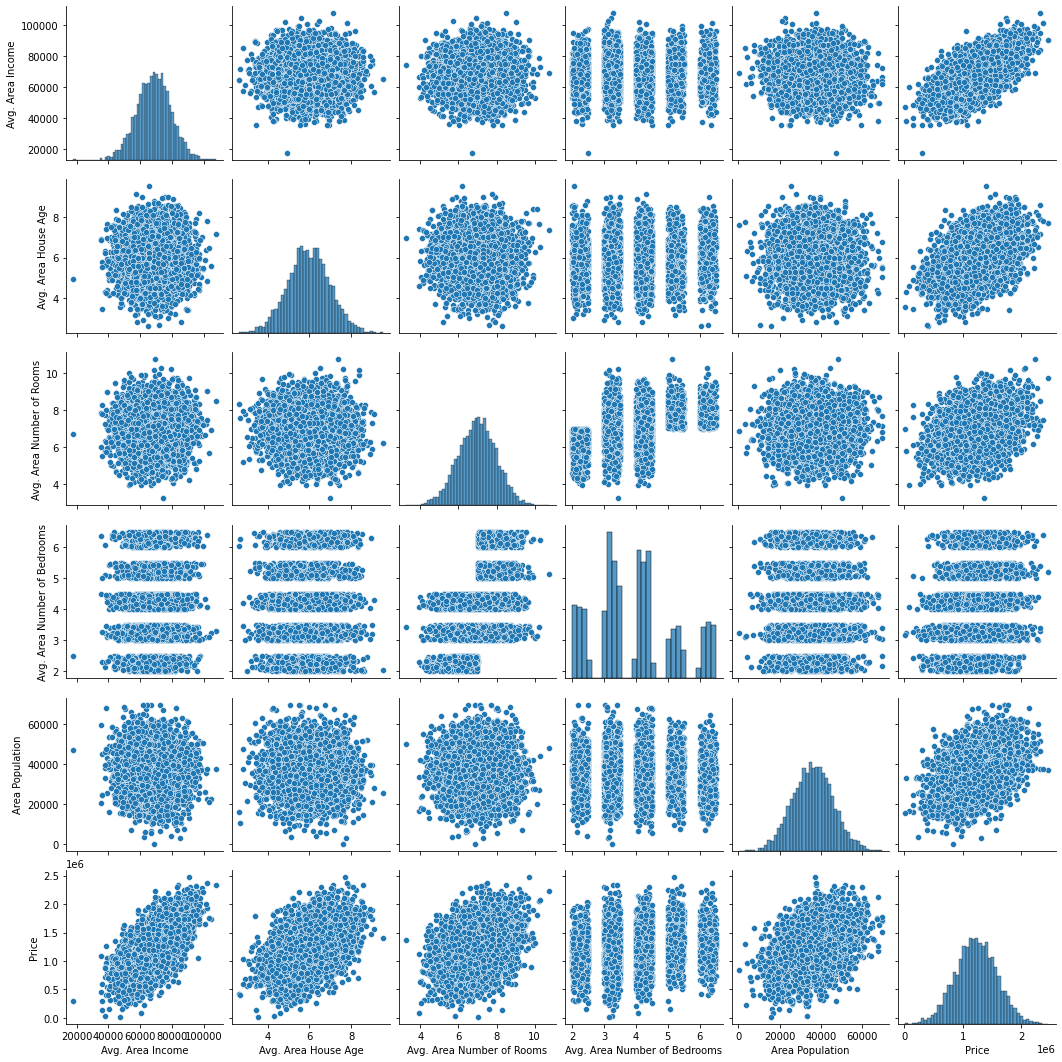

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Density'>

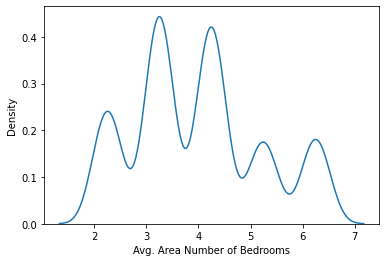

In [12]:
sns.kdeplot(df['Avg. Area Number of Bedrooms'])

In [13]:
import statsmodels.api as sm

In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]

In [16]:
y = df['Price']

In [17]:
x = sm.add_constant(X)

In [18]:
x

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,1.0,79248.642455,6.002900,6.730821,3.09,40173.072174
2,1.0,61287.067179,5.865890,8.512727,5.13,36882.159400
3,1.0,63345.240046,7.188236,5.586729,3.26,34310.242831
4,1.0,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...,...
4995,1.0,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,1.0,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,1.0,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,1.0,68001.331235,5.534388,7.130144,5.44,42625.620156


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state = 100)

In [21]:
x_train.shape

(4000, 6)

In [22]:
x_test.shape

(1000, 6)

In [23]:
y_train.shape

(4000,)

In [24]:
y_test.shape

(1000,)

In [25]:
model1 = sm.OLS(y_train,x_train).fit()

In [26]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Ordinary least squares
==================================================================================================
Model:                        OLS                        Adj. R-squared:               0.918      
Dependent Variable:           Price                      AIC:                          103541.7839
Date:                         2021-03-08 09:44           BIC:                          103579.5482
No. Observations:             4000                       Log-Likelihood:               -51765.    
Df Model:                     5                          F-statistic:                  8952.      
Df Residuals:                 3994                       Prob (F-statistic):           0.00       
R-squared:                    0.918                      Scale:                        1.0204e+10 
--------------------------------------------------------------------------------------------------
                                 Coef.      Std.Err.      t     P>|t|      [0.025        0.975]   
--------------------------------------------------------------------------------------------------
const                        -2632015.9121 19136.6231 -137.5382 0.0000 -2669534.3739 -2594497.4502
Avg. Area Income                   21.4378     0.1513  141.6696 0.0000       21.1411       21.7344
Avg. Area House Age            166072.4687  1607.9944  103.2793 0.0000   162919.9022   169225.0351
Avg. Area Number of Rooms      120593.1833  1784.8339   67.5655 0.0000   117093.9128   124092.4538
Avg. Area Number of Bedrooms     1136.7922  1461.2936    0.7779 0.4367    -1728.1589     4001.7433
Area Population                    15.3277     0.1618   94.7350 0.0000       15.0105       15.6449
--------------------------------------------------------------------------------------------------
Omnibus:                          4.978                  Durbin-Watson:                     2.057 
Prob(Omnibus):                    0.083                  Jarque-Bera (JB):                  4.396 
Skew:                             0.004                  Prob(JB):                          0.111 
Kurtosis:                         2.838                  Condition No.:                     939261
==================================================================================================
* The condition number is large (9e+05). This might indicate             strong multicollinearity
or other numerical problems.
"""

# Residual Analysis

Text(0.5, 1.0, 'PP plot to check normality of the error')

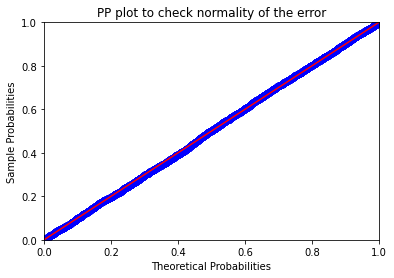

In [27]:
model1_resid = model1.resid

probplot = sm.ProbPlot(model1_resid,fit='True')
probplot.ppplot(line = '45')
plt.title('PP plot to check normality of the error')

# Test for Homoscedasticity 

In [28]:
def get_standardized_values(vals):
    return(vals - vals.mean())/ vals.std()

Text(0.5, 1.0, 'Residual Plot')

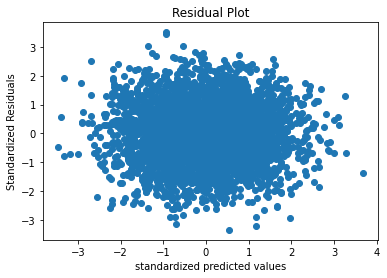

In [29]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1_resid))

plt.xlabel("standardized predicted values")
plt.ylabel('Standardized Residuals')
plt.title("Residual Plot")

In [30]:
pred_y = model1.predict(x_test)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error

In [32]:
np.abs(r2_score(y_test,pred_y))

0.9176167653120426

In [33]:
np.sqrt(mean_squared_error(y_test,pred_y))

101815.1256947623

In [34]:
pred_x = model1.predict(x_train)

In [35]:
np.sqrt(mean_squared_error(y_train,pred_x))

100940.29219761545

In [36]:
np.abs(r2_score(y_train,pred_x))

0.918077933587145

### Even though the errors are normally distributed and following the test for homoscedasticity there are some insignificant variables which needs to be removed.

In [41]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


<AxesSubplot:>

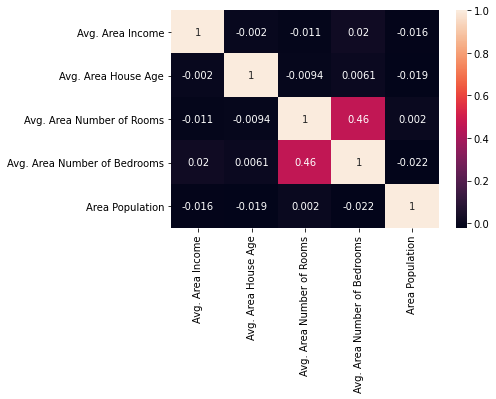

In [43]:
sns.heatmap(X.corr(),annot = True)

### Here it's observed that Average number of rooms is slightly dependent on Average number of bedrooms.

### So now let's check the insignificant variable from the summary values greater than 0.05

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8952.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:00:06   Log-Likelihood:                -51765.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.632e+06   1.91e+04   -137.538      0.000   -2.67e+06   -2.59e+06
Avg. Area Income                21.4378      0.151    141.670      0.000      21.141      21.734
Avg. Area House Age           1.661e+05   1607.994    103.279      0.000    1.63e+05    1.69e+05
Avg. Area Number of Rooms     1.206e+05   1784.834     67.565      0.000    1.17e+05    1.24e+05
Avg. Area Number of Bedrooms  1136.7922   1461.294      0.778      0.437   -1728.159    4001.743
Area Population                 15.3277      0.162     94.735      0.000      15.010      15.645
==============================================================================
Omnibus:                        4.978   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.396
Skew:                           0.004   Prob(JB):                        0.111
Kurtosis:                       2.838   Cond. No.                     9.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### From the above summary we can say that the P-value of the Avg.Area number of Bedrooms is > 0.05

### So let's drop that column and build another model

In [46]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [50]:
x_new_features = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']]

In [52]:
x = sm.add_constant(x_new_features)
x

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.0,79545.458574,5.682861,7.009188,23086.800503
1,1.0,79248.642455,6.002900,6.730821,40173.072174
2,1.0,61287.067179,5.865890,8.512727,36882.159400
3,1.0,63345.240046,7.188236,5.586729,34310.242831
4,1.0,59982.197226,5.040555,7.839388,26354.109472
...,...,...,...,...,...
4995,1.0,60567.944140,7.830362,6.137356,22837.361035
4996,1.0,78491.275435,6.999135,6.576763,25616.115489
4997,1.0,63390.686886,7.250591,4.805081,33266.145490
4998,1.0,68001.331235,5.534388,7.130144,42625.620156


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state = 100)

In [54]:
x_train.shape

(4000, 5)

In [55]:
x_test.shape

(1000, 5)

In [56]:
y_test.shape

(1000,)

In [57]:
y_train.shape

(4000,)

In [65]:
model2 = sm.OLS(y_train,x_train).fit()

In [66]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:13:19   Log-Likelihood:                -51765.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3995   BIC:                         1.036e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.632e+06   1.91e+04   -137.558      0.000   -2.67e+06   -2.59e+06
Avg. Area Income             21.4410      0.151    141.753      0.000      21.144      21.738
Avg. Area House Age        1.661e+05   1607.868    103.293      0.000    1.63e+05    1.69e+05
Avg. Area Number of Rooms  1.212e+05   1584.166     76.528      0.000    1.18e+05    1.24e+05
Area Population              15.3254      0.162     94.742      0.000      15.008      15.643
==============================================================================
Omnibus:                        4.785   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.243
Skew:                           0.004   Prob(JB):                        0.120
Kurtosis:                       2.841   Cond. No.                     9.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'PP plot to check normality of the error')

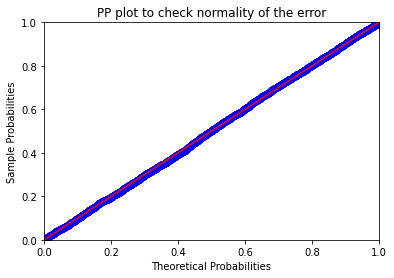

In [67]:
model2_resid = model2.resid

probplot = sm.ProbPlot(model2_resid,fit='True')
probplot.ppplot(line = '45')
plt.title('PP plot to check normality of the error')

Text(0.5, 1.0, 'Residual Plot')

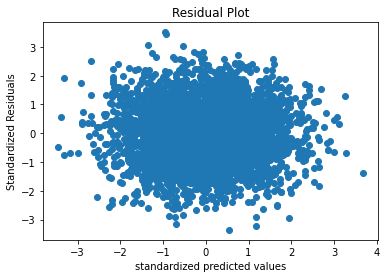

In [68]:
plt.scatter(get_standardized_values(model2.fittedvalues),get_standardized_values(model2_resid))

plt.xlabel("standardized predicted values")
plt.ylabel('Standardized Residuals')
plt.title("Residual Plot")

In [70]:
pred_y1 = model2.predict(x_test)

In [71]:
np.abs(r2_score(y_test,pred_y1))

0.9175480820797579

In [72]:
np.sqrt(mean_squared_error(y_test,pred_y1))

101857.55869123661

In [74]:
pred_x1 = model2.predict(x_train)

In [75]:
np.sqrt(mean_squared_error(y_train,pred_x1))

100947.9393061106

In [76]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
===============================================================================================
Model:                       OLS                       Adj. R-squared:              0.918      
Dependent Variable:          Price                     AIC:                         103540.3899
Date:                        2021-03-08 10:16          BIC:                         103571.8602
No. Observations:            4000                      Log-Likelihood:              -51765.    
Df Model:                    4                         F-statistic:                 1.119e+04  
Df Residuals:                3995                      Prob (F-statistic):          0.00       
R-squared:                   0.918                     Scale:                       1.0203e+10 
-----------------------------------------------------------------------------------------------
                              Coef.      Std.Err.      t     P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------------------
const                     -2632154.3624 19134.8499 -137.5581 0.0000 -2669669.3449 -2594639.3798
Avg. Area Income                21.4410     0.1513  141.7530 0.0000       21.1445       21.7376
Avg. Area House Age         166082.0595  1607.8677  103.2934 0.0000   162929.7417   169234.3773
Avg. Area Number of Rooms   121232.7018  1584.1662   76.5278 0.0000   118126.8520   124338.5515
Area Population                 15.3254     0.1618   94.7416 0.0000       15.0082       15.6425
-----------------------------------------------------------------------------------------------
Omnibus:                         4.785                 Durbin-Watson:                    2.057 
Prob(Omnibus):                   0.091                 Jarque-Bera (JB):                 4.243 
Skew:                            0.004                 Prob(JB):                         0.120 
Kurtosis:                        2.841                 Condition No.:                    939200
===============================================================================================
* The condition number is large (9e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [78]:
coefficents = pd.DataFrame(model2.params)

In [81]:
coefficents.apply(lambda s: s.apply(lambda x: format(x, 'f')))

,0
const,-2632154.362365
Avg. Area Income,21.441028
Avg. Area House Age,166082.059499
Avg. Area Number of Rooms,121232.701780
Area Population,15.325368
